# Modeling

In this notebook we
1. Load '../Data/tweets_eda.pickle' which is the output of exploratory data analysis.
2. Apply VADER for sentiment analysis to generate labels.
3. Apply different models to predict sentiment with labels generated by VADER, including LSTM & CNN.

### Import Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 500

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 8)
sns.set_palette(palette)

### Load Data

In [2]:
df = pd.read_pickle('../Data/tweets_eda.pickle')
df.head(1)

,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,Tweets_tokens_remove_special_chars_remove_stop_words_len,Tweets_tokens_remove_special_chars_remove_stop_words_counter,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",5,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'tomorrow': 1}","[(Come, 1)]","{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448}


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 19 columns):
index                                                                       7628 non-null int64
Tweets                                                                      7628 non-null object
Has_predefined_movies                                                       7628 non-null object
Tweets_tokens                                                               7628 non-null object
Tweets_tokens_len                                                           7628 non-null int64
Tweets_tokens_remove_special_chars                                          7628 non-null object
Tweets_tokens_remove_special_chars_len                                      7628 non-null int64
Tweets_tokens_counter                                                       7628 non-null object
Tweets_tokens_counter_most_common                                           7628 non-null object
Tweets_tokens_remove_sp

There are 7628 data points.

### Prepare functions for Plotting

In [4]:
def get_sub_plots(n_total_cols, n_cols, label_font_size = 14, tick_font_size = 13):
    n_rows = int(n_total_cols / n_cols)
    if n_total_cols % n_cols != 0:
        n_rows += 1

    fig, axes = plt.subplots(nrows = n_rows,
                             ncols = n_cols,
                             squeeze = False)
    
    
    fig.set_size_inches(10 * n_cols, 8 * n_rows)  
    
    if n_total_cols % n_cols != 0:
        for col in range(n_total_cols % n_cols, n_cols):
            fig.delaxes(axes[n_rows - 1][col])

    axes = axes.flatten()
    
    for ax in axes:
        ax.tick_params(labelsize = tick_font_size)
        ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
        ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)

    return (fig, axes)

def get_sub_plot(width = 16, height = 5, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_line_plot(data):
    ax = get_sub_plot()
    sns.lineplot(data = data, ax = ax)
    plt.xticks(rotation = 15)
    plt.show()

### Predict Sentiment using VADER to Generate Lables for other Modeling Algorithms

We use VADER, a popular sentiment analysis package, 
http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf
to get sentiment scores for each tweet.

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Nicole/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df['sentiment_scores'] = df['Tweets'].apply(sid.polarity_scores)
df['compound_sentiment_scores'] = df['sentiment_scores'].apply(lambda x: x['compound'])

df.head(1)

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,...,Tweets_tokens_remove_special_chars_remove_stop_words_counter,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest,sentiment_scores,compound_sentiment_scores
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",...,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'tomorrow': 1}","[(Come, 1)]","{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0


We retrieved compound sentiment score for each tweet & stored in 'compound_sentiment_scores' column. Note that the score is a floating number range from -1.0 to 1.0. -1.0 means negative while 1.0 means positive. 0 means neutral.

### Randomly Pick tweets and check their Sentiment Scores

In [7]:
import random

def random_pick_tweet_and_inspect(df, max_pct, max_num):
    n_data = df.shape[0]
    n_picked = n_data * max_pct
    if n_picked > max_num:
        n_picked = max_num
    random_sample = random.sample(range(0, n_data), n_picked)
    return df.loc[random_sample, :][['Tweets', 'compound_sentiment_scores']]

random_pick_tweet_and_inspect(df, 0.05, 20)    

,Tweets,compound_sentiment_scores
7465,Here's my full piece for the #Incredibles2 show that opened at @gallerynucleus over the weekend! Awesome to show alongside so many talented artists! pic.twitter.com/njiMBQ51Kl,0.8505
6551,I think I’m the only one who hasn’t seen incredibles2 yet :/,-0.3400
5591,Bakayoko was getting criticized on the timeline yesterday & it's only his first game lool we somehow need him to do well there so that AC Milan sign him on a permanent deal but that seems like mission impossible atm,0.4678
4886,The great Stephen Spielberg with the lovely @dylanvadamootoo and @aliwoods2788 of @frontierdev at the @JurassicWorld Fallen Kingdom Premiere - he praised the game and its animation. What more can you ask?,0.8625
6474,Only 10 days until @TheIncredibles swoops into #RealD3D UK screens! Yipppeee! Here's some VIP's including the fab @JackHoward to tell you exactly why you should be experiencing this movie in #3D. Book your tickets now! >> #Incredibles2,0.5962
3753,Brush up on your Jurassic facts and impress your friends when you watch @JurassicWorld #FallenKingdom!Get your own Action Attack Dinosaurs here:,0.4926
5838,Mark relates the new heist movie American Animals to his recent series Secrets Of Cinema.…,0.0000
7090,"A family with this much power deserves all the screen space this world has to offer. So, we're giving it to them. #Incredibles2 is now playing in IMAX:",0.5390
5702,"AMERICAN ANIMALS: dead slow first act. Cineliterate; too many references rammed into the screenplay. Well made; plenty visually striking/interesting shots. Not a 'film-worthy' story whatsoever. ""It premiered at Sundance"" tells you more than any hyped-up review could.SCORE: 4/10",-0.4939
4589,We spotted one of the extras from @JurassicWorld traveling through MSP.,0.0000


Looking at the scores, VADER does a pretty good job.

### Plot Average / Minimum / Maximum Sentiment Scores for each Movie

In [8]:
# Collect average, min & max sentiment score for each movie.
df['Has_predefined_movies_strs'] = df['Has_predefined_movies'].apply(str)

df_avg_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['Has_predefined_movies', 'compound_sentiment_scores'].mean()).reset_index()
df_avg_movie_sentiment.columns = ['Has_predefined_movies_strs', 'ave_scores']
df_min_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['compound_sentiment_scores'].min()).reset_index()
df_min_movie_sentiment.columns = ['Has_predefined_movies_strs', 'min_scores']
df_max_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['compound_sentiment_scores'].max()).reset_index()
df_max_movie_sentiment.columns = ['Has_predefined_movies_strs', 'max_scores']

print(df_avg_movie_sentiment.head())
print(df_min_movie_sentiment.head())
print(df_max_movie_sentiment.head())

                       Has_predefined_movies_strs  ave_scores
0                                      ['adrift']    0.119587
1  ['americananimals', 'incredibles2', 'oceans8']    0.000000
2             ['americananimals', 'incredibles2']   -0.024033
3            ['americananimals', 'jurassicworld']   -0.307300
4                 ['americananimals', 'mammamia']    0.939700
                       Has_predefined_movies_strs  min_scores
0                                      ['adrift']     -0.7443
1  ['americananimals', 'incredibles2', 'oceans8']      0.0000
2             ['americananimals', 'incredibles2']     -0.3885
3            ['americananimals', 'jurassicworld']     -0.3073
4                 ['americananimals', 'mammamia']      0.9397
                       Has_predefined_movies_strs  max_scores
0                                      ['adrift']      0.9749
1  ['americananimals', 'incredibles2', 'oceans8']      0.0000
2             ['americananimals', 'incredibles2']      0.3164
3       

In [9]:
# Join the 3 dataFrame into one.
df_movie_sentiment = df_avg_movie_sentiment.merge(df_min_movie_sentiment, on = 'Has_predefined_movies_strs', how = 'outer')
df_movie_sentiment = df_movie_sentiment.merge(df_max_movie_sentiment, on = 'Has_predefined_movies_strs', how = 'outer')

# Keep rows where only one movie is present.
mask = df_movie_sentiment.Has_predefined_movies_strs.str.contains(',')
df_movie_sentiment = df_movie_sentiment.loc[~mask, :]
df_movie_sentiment['movie'] = df_movie_sentiment['Has_predefined_movies_strs'].apply(lambda x: x[2:-2])
df_movie_sentiment.head(20)

,Has_predefined_movies_strs,ave_scores,min_scores,max_scores,movie
0,['adrift'],0.119587,-0.7443,0.9749,adrift
6,['americananimals'],0.275057,-0.8748,0.9595,americananimals
13,['bookclub'],0.314703,-0.9735,0.9835,bookclub
21,['crazyrichasians'],0.389219,-0.9460,0.9900,crazyrichasians
23,['incredibles2'],0.265126,-0.9033,0.9775,incredibles2
26,['inthefade'],0.243986,-0.8979,0.9337,inthefade
31,['jurassicworld'],0.217215,-0.9451,0.9774,jurassicworld
37,['mammamia'],0.216199,-0.7543,0.9469,mammamia
45,['missionimpossible'],0.152282,-0.9136,0.9618,missionimpossible
46,['oceans8'],0.193227,-0.9446,0.9860,oceans8


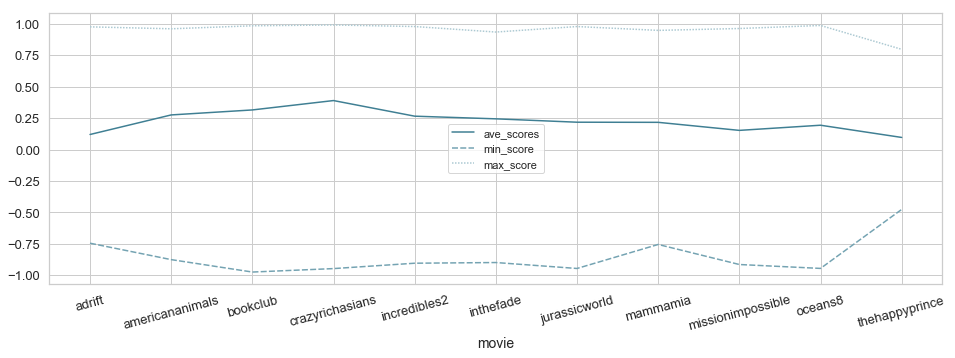

In [10]:
# Get dataframe for plotting scores for each movie.
index = df_movie_sentiment['movie']
data = []
for i, row in df_movie_sentiment.iterrows():
    data.append([row['ave_scores'], row['min_scores'], row['max_scores']])
df_movie_sentiment_plot = pd.DataFrame(data, index, ['ave_scores', 'min_score', 'max_score'])

plot_line_plot(df_movie_sentiment_plot)

Based on the above plot,
1. Crazy rich asians has the highest average sentiment score.
2. The bookclub has the lowest minimum sentiment score.
3. Most of the movies has at least one pretty high score while crazy rich asians still has the highest maximum score.
4. Interestingly The Happy Prince has the lowest maximum score and highest minimum score.

Up until now we directly inspect & utilize sentiment socres from VADER. However as we want to classify the sentiment into 5 groups, negative, somewhat negative, neutral, somewhat positive & positive, let's see the histogram of scores and see if there's any intuitive way to group them.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


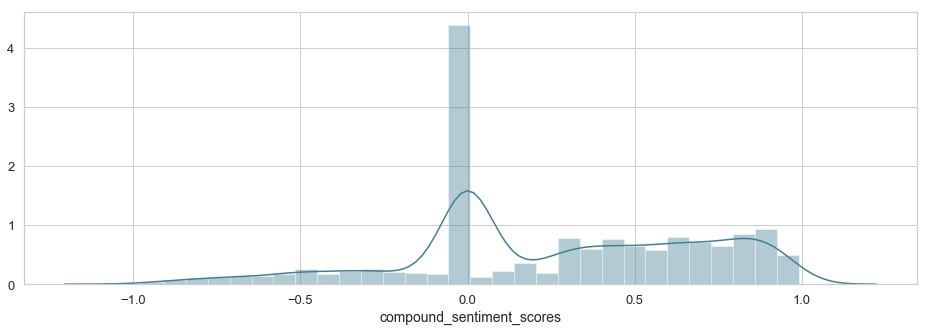

In [11]:
def plot_dist_plot(data):
    ax = get_sub_plot()
    sns.distplot(data, ax = ax)
    plt.show()
    
plot_dist_plot(df['compound_sentiment_scores'])

Looking at the above histogram, there are a lot of scores closed to 0, which apparently can be classified as 'neutral'.

Also we classify them into 5 groups using three threshold -0.5, 0 & 0.5.

In [12]:
def apply_sentiment_class(x):
    if x == 0:
        return 'neutral'
    elif x > 0 and x <= 0.5:
        return 'somewhat positive'
    elif x > 0.5 and x <= 1:
        return 'positive'
    elif x < 0 and x >= -0.5:
        return 'somewhat negative'
    else:
        return 'negative'
    
df['semtiment_class'] = df['compound_sentiment_scores'].apply(apply_sentiment_class)

df.head(1)

,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,...,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest,sentiment_scores,compound_sentiment_scores,Has_predefined_movies_strs,semtiment_class
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",...,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,['oceans8'],neutral


With the label generated using VADER. We can use them to train our own models.

### Explore Data & Preprocess Features & Target

As we would like to predict sentiment with tweets. Our features would be tweets and target would be sentiment we acquired using VADER.

In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

max_fatures = 2000

# Let's tranform all tweets to lower case first.
df['Tweets_lower'] = df['Tweets'].apply(lambda x: x.lower())
# and also encode sentiment class
label_encoder = LabelEncoder()
df['semtiment_class_encoded'] = label_encoder.fit_transform(df['semtiment_class'])

def get_word_level_X(df, features):
    tokenizer = Tokenizer(num_words = max_fatures, split = ' ')
    tokenizer.fit_on_texts(df[features].values)

    X = tokenizer.texts_to_sequences(df[features].values)
    X = pad_sequences(X)
    
    return X

def get_y(df, target):
    y = to_categorical(df[target])
    
    return y

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Prepare functions for Scoring & Reporting

TODO: With labels generated by VADER, our problem has become a text classification problem and we report confusion matrix for each model.

In [14]:
from numpy import argmax
from sklearn.metrics import confusion_matrix

def score_and_report(X_test, y_test, y_pred, model, batch_size):
    score, acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
    print("score: %.2f" % (score))
    print("acc: %.2f" % (acc))

    y_test_decoded = [argmax(y_test[i]) for i in range(y_test.shape[0])]    

    confusion_matrix(y_test_decoded, y_pred)
    print()
    
    return (score, acc)

### Prepare functions for Modeling

#### We will first try the following models:
1. RNN / LSTM
2. CNN

#### Train-Test-Split, Cross-Validation & Standardization
TODO: We also use train_test_split to do train-test split.

In [15]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.layers import Convolution1D, Flatten, Dropout

Models = ['LSTM', 'CNN']
# TODO
# TCN: https://github.com/philipperemy/keras-tcn
# mLSTM: https://github.com/titu1994/Keras-Multiplicative-LSTM

def model(model_mode, X, y):
    if model_mode not in Models:
        print('Mode not defined')
        return

    embed_dim = 128
    
    if model_mode == 'LSTM':
        lstm_out = 196
        
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(SpatialDropout1D(0.4))
        model.add(LSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2))
        model.add(Dense(5, activation = 'softmax'))
    elif model_mode == 'CNN':
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(Convolution1D(64, 3, border_mode = 'same'))
        model.add(Convolution1D(32, 3, border_mode = 'same'))
        model.add(Convolution1D(16, 3, border_mode = 'same'))
        model.add(Flatten())
        model.add(Dropout(0.2))
        model.add(Dense(180, activation = 'sigmoid'))
        model.add(Dropout(0.2))
        model.add(Dense(5, activation = 'softmax'))
    
    print('Model:', model_mode)
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    print(model.summary())

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)
              
    batch_size = 32
    model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose = 2)
    
    y_pred = model.predict_classes(X_test)
    
    score, acc = score_and_report(X_test, y_test, y_pred, model, batch_size)
    
    return (score, acc)

def try_all_models(X, y):
    modelScores, modelAccs = {}, {}
    for m in Models:
        score, acc = model(model_mode = m, X = X, y = y)
        modelScores[m] = score
        modelAccs[m] = acc
    return (modelScores, modelAccs)

### Define Features & Target

Let's first try word-level modeling.

In [16]:
X = get_word_level_X(df, 'Tweets_lower')
y = get_y(df, 'semtiment_class_encoded')

### Modeling -- Word-Level

Let's try all predefined models quickly.

In [17]:
modelScores, modelAccs = try_all_models(X, y)

Model: LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 52, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 52, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 985       
Total params: 511,785
Trainable params: 511,785
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 - 21s - loss: 1.3348 - acc: 0.4661
Epoch 2/10
 - 20s - loss: 1.0606 - acc: 0.5920
Epoch 3/10
 - 18s - loss: 0.8623 - acc: 0.6800
Epoch 4/10
 - 22s - loss: 0.7111 - acc: 0.7466
Epoch 5/10
 - 24s - loss: 0.6249 - acc: 0.7840
Epoch 6/10
 - 20

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 52, 128)           256000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 52, 64)            24640     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 52, 32)            6176      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 52, 16)            1552      
_________________________________________________________________
flatten_1 (Flatten)          (None, 832)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 832)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 180)               149940    
__________

In [18]:
#scoresDf = pd.DataFrame(list(modelScores.items()))
#scoresDf.columns = ['Model', 'Score']

#fig, axes = get_sub_plots(1, 1)
#sns.pointplot(x = "Model", y = "Score", data = scoresDf, ax = axes[0])
#plt.show()

#accDf = pd.DataFrame(list(modelAccs.items()))
#accDf.columns = ['Model', 'Accuracy']

#fig, axes = get_sub_plots(1, 1)
#sns.pointplot(x = "Model", y = "Accuracy", data = accDf, ax = axes[0])
#plt.show()

So far RNN outperforms CNN on accuracy while CNN runtime is about 5X.

### Modeling -- Character-Level

We can also try character level as many researches have shown significant improvement.

In [19]:
# TODO
def get_character_level_X(df, features):
    tokenizer = Tokenizer(num_words = max_fatures, split = ' ')
    tokenizer.fit_on_texts(df[features].values)

    X = tokenizer.texts_to_sequences(df[features].values)
    X = pad_sequences(X)
    
    return X

X = get_character_level_X(df, 'Tweets_lower')
y = get_y(df, 'semtiment_class_encoded')

In [21]:
# try_all_models(X, y)

TODO: Compare models here.

TODO:
1. Apply pre-trainsed model in embedding

### Conclusion
TODO.

### Next Steps
1. When acquiring labels with VADER, we can try to apply other strategies instead of using hard threshold.
2. Apply dimmensionality reduction on texts to see if results are better.